In [132]:
!pip install qiskit
import qiskit as qk
from qiskit.tools import visualization as visual

In [0]:
quantum_bits = qk.QuantumRegister(9)

classical_bits = qk.ClassicalRegister(9)

In [0]:
encoder_circuit = qk.QuantumCircuit(quantum_bits, classical_bits)

In [136]:
encoder_circuit.h(quantum_bits[0])

print(quantum_bits[0])
#Phase Flip part

encoder_circuit.cx(quantum_bits[0], quantum_bits[3])
encoder_circuit.cx(quantum_bits[0], quantum_bits[6])

##
#encoder_circuit.x(quantum_bits[6])
##

encoder_circuit.h(quantum_bits[0])
encoder_circuit.h(quantum_bits[3])
encoder_circuit.h(quantum_bits[6])

#Bit Flip part

encoder_circuit.cx(quantum_bits[0], quantum_bits[1])
encoder_circuit.cx(quantum_bits[3], quantum_bits[4])
encoder_circuit.cx(quantum_bits[6], quantum_bits[7])

encoder_circuit.cx(quantum_bits[0], quantum_bits[2])
encoder_circuit.cx(quantum_bits[3], quantum_bits[5])
encoder_circuit.cx(quantum_bits[6], quantum_bits[8])

#Quantum channel
encoder_circuit.x(quantum_bits[2])

#Bit Flip part

encoder_circuit.cx(quantum_bits[0], quantum_bits[2])
encoder_circuit.cx(quantum_bits[3], quantum_bits[5])
encoder_circuit.cx(quantum_bits[6], quantum_bits[8])

encoder_circuit.cx(quantum_bits[0], quantum_bits[1])
encoder_circuit.cx(quantum_bits[3], quantum_bits[4])
encoder_circuit.cx(quantum_bits[6], quantum_bits[7])

encoder_circuit.ccx(quantum_bits[1], quantum_bits[2], quantum_bits[0])
encoder_circuit.ccx(quantum_bits[4], quantum_bits[5], quantum_bits[3])
encoder_circuit.ccx(quantum_bits[7], quantum_bits[8], quantum_bits[6])

#Phase Flip part

encoder_circuit.h(quantum_bits[0])
encoder_circuit.h(quantum_bits[3])
encoder_circuit.h(quantum_bits[6])

##
#encoder_circuit.x(quantum_bits[6])
##

encoder_circuit.cx(quantum_bits[0], quantum_bits[6])
encoder_circuit.cx(quantum_bits[0], quantum_bits[3])
encoder_circuit.ccx(quantum_bits[3], quantum_bits[6], quantum_bits[0])

(QuantumRegister(9, 'q20'), 0)


In [137]:
encoder_circuit.measure(quantum_bits, classical_bits)

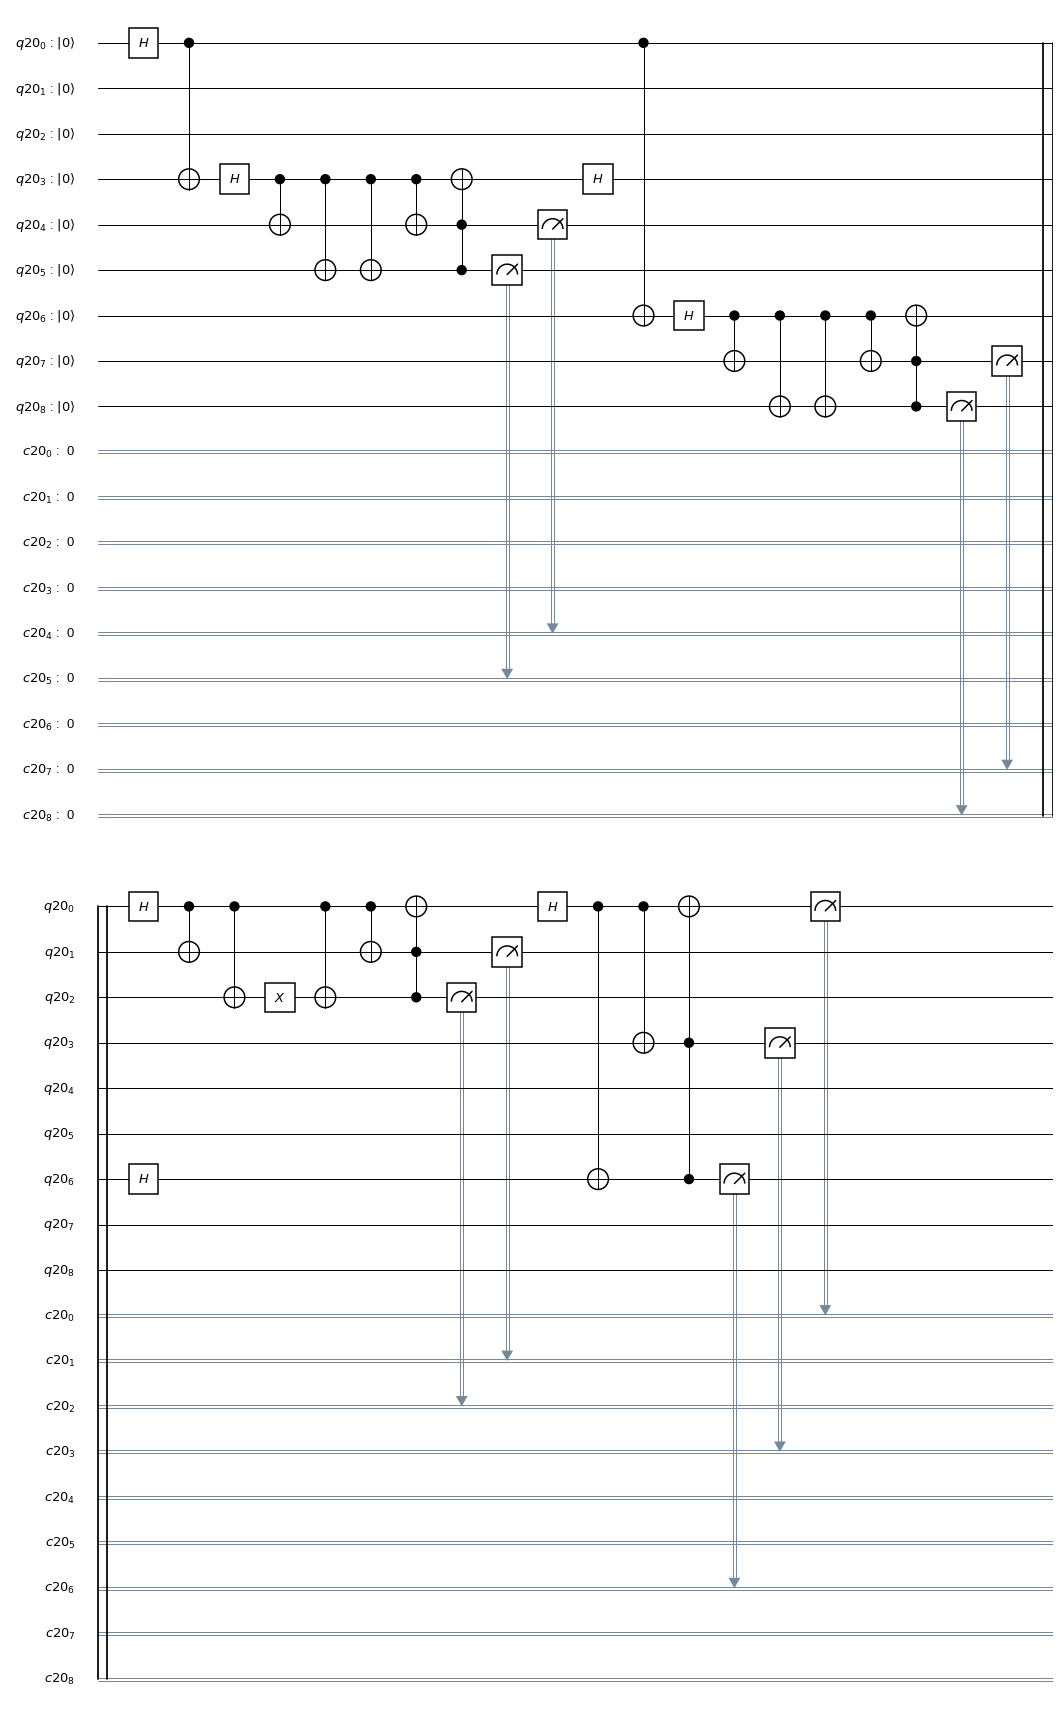

In [138]:
visual.circuit_drawer(encoder_circuit)

In [139]:
backend_sim = qk.Aer.get_backend('qasm_simulator')
job_sim = qk.execute(encoder_circuit, backend_sim)
result_sim = job_sim.result()

# Show the results
print("simulation: ", result_sim )
print(result_sim.get_counts(encoder_circuit))

simulation:  COMPLETED
{'000000100': 530, '000000101': 494}


(QuantumRegister(9, 'q39'), 0)
